# __THƯ VIỆN__

In [22]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn

from PIL import Image

import os
import io

import easyocr
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import json
import re
import csv

reader = easyocr.Reader(['vi'])

# __DỮ LIỆU__

In [23]:
folder = '/content/drive/MyDrive/Sarcasm'

In [24]:
file_name = "C:/Users/pbang/Downloads/vimmsd-private-test.json"

with open(file_name, 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)
df = df.transpose()
df.head()

,image,caption,label
0,066d6021fdfeaf39f1dec523879e8fe4d35e877abcea44...,Song Joong Ki &amp; Song Hye Kyo đều tham dự B...,None
1,555f4787d4df49e7be743b3d5b77c90755f0d6c351f36b...,Song Joong Ki &amp; Song Hye Kyo đều tham dự B...,None
2,7b7cdea2cde1f3f93371259b587a03f2e8c0af682b4d51...,Song Joong Ki &amp; Song Hye Kyo đều tham dự B...,None
3,80167e59d729cf3aaba5d2d3da40db6995cb8a6a8c4a88...,Song Joong Ki &amp; Song Hye Kyo đều tham dự B...,None
4,59db087307031d60755af3a5c01a44ba55a04bfab21027...,Ngang trái thậc 🤣,None


# __HÀM__

## __TÁCH CÁC VÙNG VĂN BẢN TRONG ẢNH__

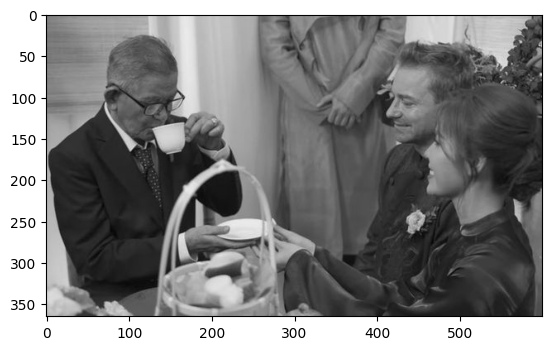

In [25]:
# Đường dẫn đến ảnh
image_path = "C:/Users/pbang/Downloads/private-test-images/test-images/000af5cf5da58e253d246cc1fbe8604567cb4aed9c10621d4bf5f506ededcd06.jpg"

# Load image bằng PIL
image_pil = Image.open(image_path)

# Chuyển đổi từ PIL Image sang numpy array
image_np = np.array(image_pil)

# Thực hiện OCR
result = reader.readtext(image_np)

# Hàm để cắt và lưu các vùng chứa văn bản vào một danh sách
def cut_text_regions(image, result):
    cropped_images = []  # Danh sách để lưu các hình ảnh cắt được
    num_regions = len(result)

    for idx, (bbox, _, _) in enumerate(result):  # Không cần văn bản, chỉ cần bbox
        # Lấy tọa độ bounding box
        (x0, y0), (x1, y1), (x2, y2), (x3, y3) = bbox
        x = int(min(x0, x1, x2, x3))
        y = int(min(y0, y1, y2, y3))
        w = int(max(x0, x1, x2, x3) - x)
        h = int(max(y0, y1, y2, y3) - y)

        # Cắt hình ảnh
        cropped_image = image.crop((x, y, x + w, y + h))

        # Lưu hình ảnh cắt được vào danh sách
        cropped_images.append(cropped_image)

    return cropped_images

# Lưu các hình ảnh chứa văn bản vào một danh sách
cropped_images_list = cut_text_regions(image_pil, result)

# Hàm để hiển thị kết quả OCR
def plot_ocr_results(image, result):
    plt.imshow(image)
    ax = plt.gca()

    for bbox, text, confidence in result:
        # Convert bounding box coordinates to integers
        xmin, ymin = map(int, bbox[0])
        xmax, ymax = map(int, bbox[2])

        # Create a rectangle patch for the bounding box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')

        # Add the patch to the plot
        ax.add_patch(rect)

        # Add the text to the plot
        plt.text(xmin, ymin, text, color='r', fontsize=8)

    plt.show()

# Hiển thị kết quả OCR trên hình ảnh gốc
plot_ocr_results(image_pil, result)

# Tại đây, bạn có thể sử dụng 'cropped_images_list' để làm gì đó với các hình ảnh cắt được.

In [26]:
# Hiển thị các hình ảnh cắt
plt.figure(figsize=(15, 10))
for idx, img in enumerate(cropped_images_list):
    plt.subplot(1, len(cropped_images_list), idx + 1)  # Tạo các subplots
    plt.imshow(img)  # Hiển thị hình ảnh
    plt.axis('off')  # Tắt trục

plt.show()  # Hiển thị tất cả các hình ảnh

<Figure size 1500x1000 with 0 Axes>

In [27]:
# Hiển thị từng hình ảnh trong danh sách cropped_images_list
def display_cropped_images(cropped_images):
    for idx, cropped_image in enumerate(cropped_images):
        plt.figure(figsize=(5, 5))
        plt.imshow(cropped_image)
        plt.axis('off')  # Tắt trục
        plt.show()

# Gọi hàm để hiển thị các hình ảnh cắt được
display_cropped_images(cropped_images_list)

## __ĐỌC VĂN BẢN TRONG ẢNH ĐÃ CẮT__

In [28]:
# ! wget https://vocr.vn/data/vietocr/sample.zip
# ! unzip  -qq -o sample.zip
# ! ls sample | shuf |head -n 5

In [29]:
# pip install vietocr

In [30]:
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

config = Cfg.load_config_from_name('vgg_transformer')
detector = Predictor(config)

c:\Users\pbang\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Model weight C:\Users\pbang\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


C:\Users\pbang\AppData\Roaming\Python\Python312\site-packages\vietocr\tool\predictor.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(we

In [31]:
def display_and_predict(cropped_images):
    results = []

    for idx, cropped_image in enumerate(cropped_images):
        text = detector.predict(cropped_image)
        results.append(text)

    return results

predicted_texts = display_and_predict(cropped_images_list)

In [32]:
df['image'].head()

0    066d6021fdfeaf39f1dec523879e8fe4d35e877abcea44...
1    555f4787d4df49e7be743b3d5b77c90755f0d6c351f36b...
2    7b7cdea2cde1f3f93371259b587a03f2e8c0af682b4d51...
3    80167e59d729cf3aaba5d2d3da40db6995cb8a6a8c4a88...
4    59db087307031d60755af3a5c01a44ba55a04bfab21027...
Name: image, dtype: object

In [33]:
with open('text_in_image.csv','w', newline='', encoding='utf-16') as file_output:
  headers = ['Label']
  writer = csv.DictWriter(file_output, delimiter =',', lineterminator = '\n' , fieldnames = headers)
  writer.writeheader()  
  for idx, row in df.iterrows():

    image_path = "C:/Users/pbang/Downloads/private-test-images/test-images/" + row['image']
    image_pil = Image.open(image_path)

    image_np = np.array(image_pil)
    result = reader.readtext(image_np)

    cropped_images_list = cut_text_regions(image_pil, result)

    predicted_texts = display_and_predict(cropped_images_list)

    # if(len(predicted_texts) > 0):
    final_text = ' '.join(predicted_texts)
    print(row['image'], final_text)
    writer.writerow({headers[0]:final_text})
    print()

066d6021fdfeaf39f1dec523879e8fe4d35e877abcea44c428d45e1b81554444.jpg LINVE

555f4787d4df49e7be743b3d5b77c90755f0d6c351f36b02c364775d5929b7c4.jpg Wileup

7b7cdea2cde1f3f93371259b587a03f2e8c0af682b4d519ef752706d83627d2c.jpg AMANYMS Brizm LINVE

80167e59d729cf3aaba5d2d3da40db6995cb8a6a8c4a8896f705967c93073390.jpg Brizm LINVE

59db087307031d60755af3a5c01a44ba55a04bfab210273c6b55b29b30e46000.jpg m 12 GNOGASA ROUP FAN MUSẼ THẤY THẬT LÀ CẢM GIÁC KHI CHỨNG KIẾN MẤY TIỀN ĐẠO ĐỘI MÌNH PHẾ VCH CÒN NGƯỜI BỊ ĐẨY ĐI THÌ TRỞ THÀNH CẦU THỦ HAY NHẤT MÙA CỦA GETAFE facebookcom/trollbongdate youtubes com/trollbongdaofficial

890afe8876f613a6db0c9585c3167f59a1b28600d675ff7baadae56e4531c160.jpg GONG SHOWLING

e981cca991e528b2f84a5ee5f4dbf5b3af760cfb8c2d27cb49fa123b90c317fb.jpg 

e0c20657e0af9eb96209b694837986df6fd87b1f61746d157b3dbb65eb51fb31.jpg bé chọn NT JAI ADS

aa24511fde138e0c83e9a17201f1094b5f9db0065aac09bc66d20f6a9f1ecad1.jpg co BESTOOM nad

4f9d53aae1f1d108132d73ca176a7445bf399e9c155c99301669b91ab

C:\Users\pbang\AppData\Roaming\Python\Python312\site-packages\vietocr\tool\translate.py:115: RuntimeWarning: invalid value encountered in divide
  char_probs = np.sum(char_probs, axis=-1)/(char_probs>0).sum(-1)


7b4a29d75544eadcbb016ab5cddadce00e1bd40e3b30d19b608983d636af07c0.jpg Ahnoe 

56025b2c8c6942300367dd3c50f8a951c1ad384c813fb7fbea379567b6999997.jpg REFUND MISS

fcd0a898a47b2c5a3eaf063e9175714e8eb295b9095fba13faf4d1d7b6858778.jpg REF MIS

990e6ebd54ac002f028b405256bbf80b1f90eb0d2760456a4b7bcdc362e47eb4.jpg Nói gì đó dơ bẩn với e đi2 sửa xe đóa e.A già nơ ông garel trollxe Hồi hót ông cho quá

21b55b10f66001ea74a1191950a5a72aca92a62393c3986ddbb9cfba4501f58e.jpg Hồng Hót Showbiz

c560cdb2bf88e3560a43fab023284773e40f3c73ad873891224244b7951f3577.jpg 

b12d1ce96c4fd96956b5c746ee2e0fca14274f8e5b4840fd4d8a917f1494170a.jpg 

adc3277e67c747fa29116433f1b331cdb474163230db3938eda02dc7688b73c8.jpg 

a2660594958c6facb685e70f0fdab2dbd3be7beb8966d11af4bb1d19a8a34e0a.jpg ctz LIMIT HE

7890019f6eaa5da1ddcf478661f48b282b2a776d5bea473805dc5c5419d18af8.jpg 

0c18bf1bbd7dceab8401994fa1387d51532761776c8620710e795830115b74d7.jpg THÁNG SINH - ĐỒ CHƠI CỦA MÀI THÁNG 1 THÁNG 2 THÁNG 3 THÁNG 4 w2c THÁNG 5 1 THÁNG 6 

In [34]:
data_frame = pd.read_csv("C:/Users/pbang/Downloads/text_in_image.csv", encoding='utf-16')


In [35]:
data_frame.shape

(1504, 1)

In [36]:
df['image']

0       066d6021fdfeaf39f1dec523879e8fe4d35e877abcea44...
1       555f4787d4df49e7be743b3d5b77c90755f0d6c351f36b...
2       7b7cdea2cde1f3f93371259b587a03f2e8c0af682b4d51...
3       80167e59d729cf3aaba5d2d3da40db6995cb8a6a8c4a88...
4       59db087307031d60755af3a5c01a44ba55a04bfab21027...
                              ...                        
1499    3c643826258f8aacc8a98d8e24956f909797010f1e80bd...
1500    09f5adf3e555d3066eae0be356e5ce797c066706e7c808...
1501    b11515c1aa521da4f6d0cd6464e5ea3e030662cdd43f7f...
1502    8a83634808704a5c7493327893f793effd6e78cb037ac4...
1503    20f81dd1d0329d6b7e5778304422a3621dae460a433ac2...
Name: image, Length: 1504, dtype: object

In [37]:
data_frame['image']= list(df['image'])
data_frame

,Label,image
0,LINVE,066d6021fdfeaf39f1dec523879e8fe4d35e877abcea44...
1,Wileup,555f4787d4df49e7be743b3d5b77c90755f0d6c351f36b...
2,AMANYMS Brizm LINVE,7b7cdea2cde1f3f93371259b587a03f2e8c0af682b4d51...
3,Brizm LINVE,80167e59d729cf3aaba5d2d3da40db6995cb8a6a8c4a88...
4,m 12 GNOGASA ROUP FAN MUSẼ THẤY THẬT LÀ CẢM GI...,59db087307031d60755af3a5c01a44ba55a04bfab21027...
...,...,...
1499,Thắng Cuội 1 giờ Mẹ bảo hai đứa nên đi tập gym...,3c643826258f8aacc8a98d8e24956f909797010f1e80bd...
1500,"A/ KFC] TỪ ĂN LẤY HÊN ĐI CON, COMBO LỘC PHÚC V...",09f5adf3e555d3066eae0be356e5ce797c066706e7c808...
1501,"BÉO [RA RỒI SUỐT NGÀY ĂN VỚI NGỦ, PHẢI KIỂM SO...",b11515c1aa521da4f6d0cd6464e5ea3e030662cdd43f7f...
1502,24 09638222222 Mediavtv24eagmall.com 76% số ca...,8a83634808704a5c7493327893f793effd6e78cb037ac4...


In [38]:
data_frame.to_csv("C:/Users/pbang/Downloads/file_text_in_image.csv", encoding='utf-8', index=False)

In [39]:
data_frame.to_excel("C:/Users/pbang/Downloads/file_text_in_image.xlsx", index=False)

In [40]:
df_ex = pd.read_excel("C:/Users/pbang/Downloads/file_test.xlsx") 

In [41]:
df_ex

,Label,image
0,Monday at 11:41 AM Title: Sắp có đợt nóng 45 đ...,bb934d7d7f7652903c24272d405e4b31c70689cec93f86...
1,s2.heartbreak Senior Member Today at 12:39 AM ...,449a108232be3d220679d7c500ee0aa3203920c0116319...
2,Pin mặt trời khiến giá điện âm ở California Mỹ...,2c17cee0245711376b566a65d1a9d25066317fc894fc0a...
3,CrisDevilGamer Vừa xong Hưng Theodon và sân nà...,f5103b29053845e84baabbf4111b83fa9150f2aaa5e605...
4,NaN,679e017d422dae281efdc2e2500668e2618603da93d21d...
...,...,...
1408,Nguyễn Mạnh Lý Theo dõi chuột gì thế bác -))) ...,c0126eb4dcba36f3174cc45b5ed15f9ddb4fb5bb66d3fc...
1409,Gặp Lại Phạm Minh sao em nhìn con này với trên...,b493dd2d61c2e9371cc04de9f4d0182249613a11197052...
1410,Phạm Minh Tác giả Thanh Thuy uhm e bắt nó mà b...,2ba9d6a713df23c4176bbddfd93bf30a7b21da06a0fb67...
1411,Từ Tấn Bửu Phạm Minh hamster hã bác 2 ngày Thí...,17ab70c64ccf16707c51d5b77ab9fc2718471232218bcf...
